In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("http://51.91.120.89/extras/gapminderDataFiveYear.csv").query(" year==2007 ")
df

,country,year,pop,continent,lifeExp,gdpPercap
11,Afghanistan,2007,31889923.0,Asia,43.828,974.580338
23,Albania,2007,3600523.0,Europe,76.423,5937.029526
35,Algeria,2007,33333216.0,Africa,72.301,6223.367465
47,Angola,2007,12420476.0,Africa,42.731,4797.231267
59,Argentina,2007,40301927.0,Americas,75.320,12779.379640
...,...,...,...,...,...,...
1655,Vietnam,2007,85262356.0,Asia,74.249,2441.576404
1667,West Bank and Gaza,2007,4018332.0,Asia,73.422,3025.349798
1679,"Yemen, Rep.",2007,22211743.0,Asia,62.698,2280.769906
1691,Zambia,2007,11746035.0,Africa,42.384,1271.211593


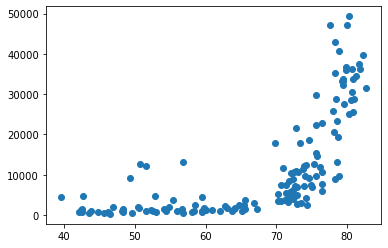

In [4]:
plt.scatter(df.lifeExp, df.gdpPercap)

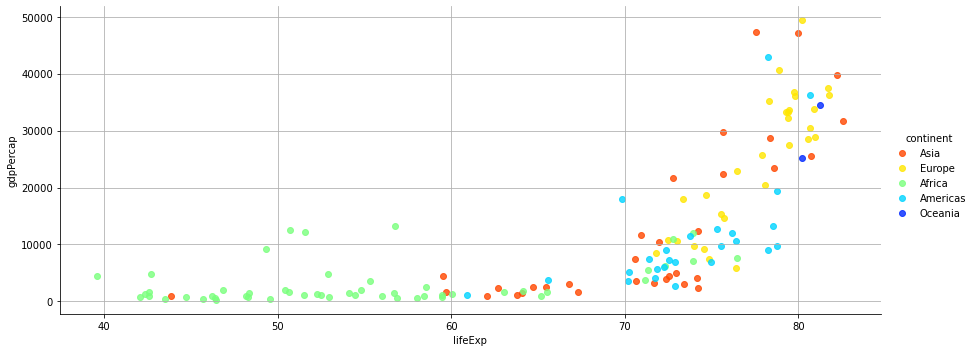

In [16]:
colors = ["yellow","red","green","blue","pink"]
sns.lmplot(data=df, x="lifeExp", y="gdpPercap", fit_reg=False, aspect=2.5, hue="continent", palette="jet_r")
plt.grid()

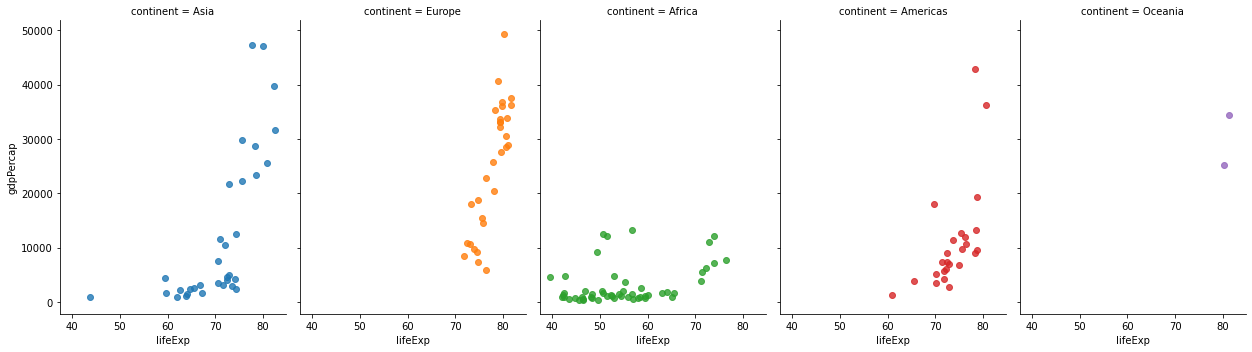

In [19]:
sns.lmplot(data=df, x="lifeExp", y="gdpPercap", fit_reg=False, aspect=0.7, col='continent', hue="continent")

C:\Users\kurs\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


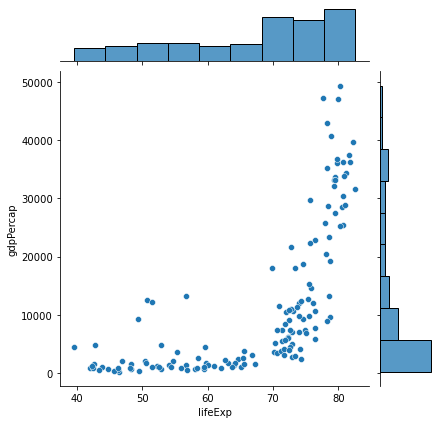

In [21]:
sns.jointplot(df.lifeExp, df.gdpPercap, kind="scatter")

C:\Users\kurs\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


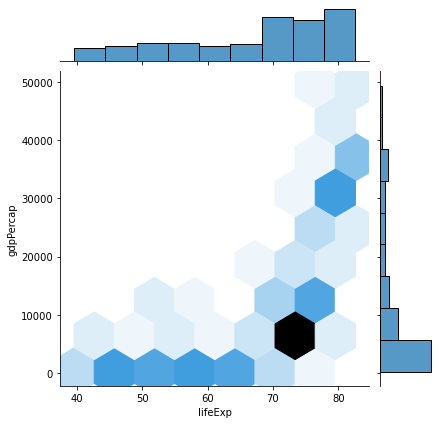

In [22]:
sns.jointplot(df.lifeExp, df.gdpPercap, kind="hex")

C:\Users\kurs\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


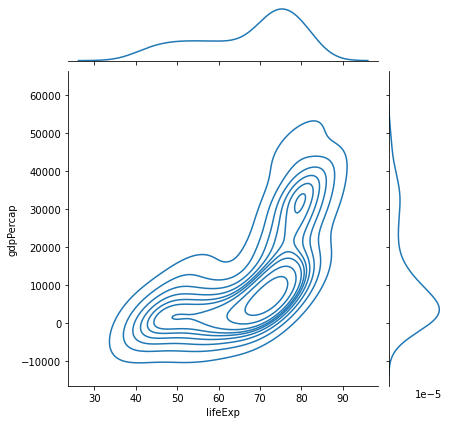

In [23]:
sns.jointplot(df.lifeExp, df.gdpPercap, kind="kde")

### Wykres liniowy

In [24]:
url_covid = "https://covid19.who.int/WHO-COVID-19-global-data.csv"
df = pd.read_csv(url_covid)
df.sample(n=10)

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
150753,2020-01-06,SS,South Sudan,AFRO,0,0,0,0
158961,2021-12-14,GB,The United Kingdom,EURO,53953,10873472,38,146477
42635,2021-09-29,DK,Denmark,EURO,530,357037,2,2689
137831,2021-08-06,PM,Saint Pierre and Miquelon,AMRO,1,29,0,0
55844,2020-12-12,PF,French Polynesia,WPRO,83,15618,0,91
53334,2020-03-27,FI,Finland,EURO,113,1301,4,25
126275,2020-10-04,PT,Portugal,EURO,963,78247,12,1995
93654,2021-10-18,MW,Malawi,AFRO,4,61716,0,2292
150941,2020-07-12,SS,South Sudan,AFRO,10,2139,0,41
111834,2020-03-27,NI,Nicaragua,AMRO,0,2,0,0


In [29]:
df.Date_reported = pd.to_datetime(df.Date_reported, format="%Y-%m-%d")

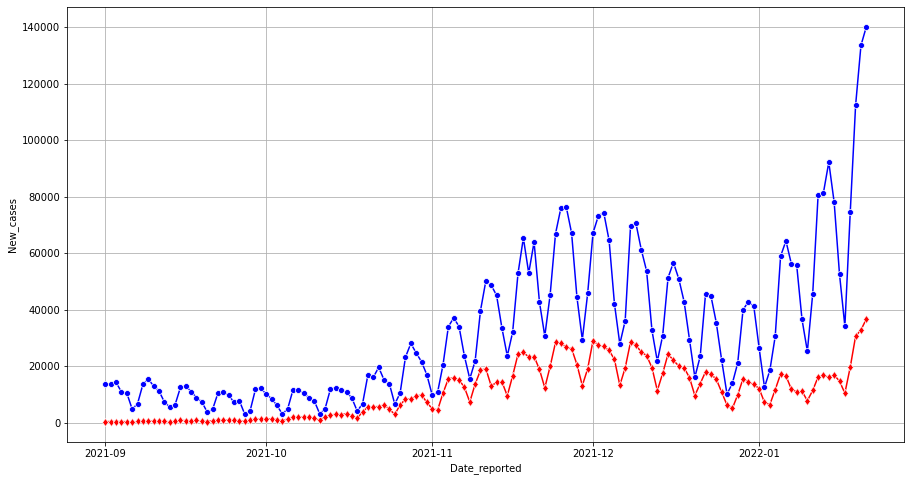

In [34]:
plt.figure(figsize=(15,8))
sns.lineplot(data=df.query(" Country_code=='PL' and Date_reported>='2021-09-01' "), 
             x="Date_reported", y="New_cases", color="red", marker="d" )

sns.lineplot(data=df.query(" Country_code=='DE' and Date_reported>='2021-09-01' "), 
             x="Date_reported", y="New_cases", color="blue", marker="o" )
plt.grid()

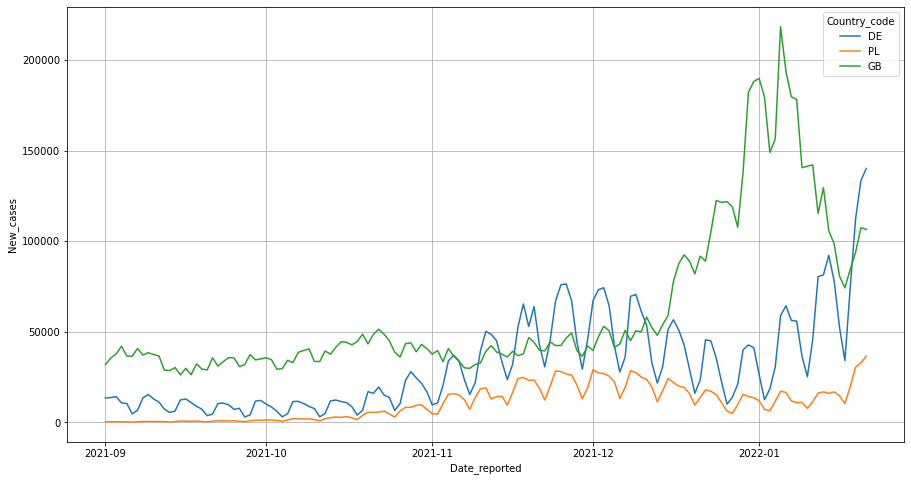

In [36]:
plt.figure(figsize=(15,8))
sns.lineplot(data=df.query(" Country_code in ['PL','DE','GB'] and Date_reported>='2021-09-01' "), 
             x="Date_reported", y="New_cases", color="red",  hue="Country_code" )

plt.grid()

TOP12 krajów z najwiekszą sumaryczna liczbąprzypadków zachorowania

In [38]:
df.WHO_region.unique()

array(['EMRO', 'EURO', 'AFRO', 'WPRO', 'AMRO', 'SEARO', 'Other'],
      dtype=object)

In [40]:
df1 = df.query(" WHO_region=='EURO' and Date_reported>='2021-06-01' ")
df1.describe()

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
count,14570.000000,1.457000e+04,14570.000000,14570.000000
mean,4976.523885,1.196001e+06,39.994029,22207.910501
std,17770.315737,2.119057e+06,130.421811,41696.365349
min,0.000000,0.000000e+00,-27.000000,0.000000
25%,57.000000,7.566600e+04,0.000000,559.250000
50%,540.000000,3.326690e+05,4.000000,5463.000000
75%,2523.750000,1.091160e+06,22.000000,17952.000000
max,432853.000000,1.561329e+07,1254.000000,324752.000000


In [47]:
countries = df1.groupby("Country")["New_cases"].sum().sort_values(ascending=False).head(12).index.to_list()
countries

['The United Kingdom',
 'France',
 'Russian Federation',
 'Turkey',
 'Italy',
 'Spain',
 'Germany',
 'Netherlands',
 'Ukraine',
 'Belgium',
 'Poland',
 'Greece']

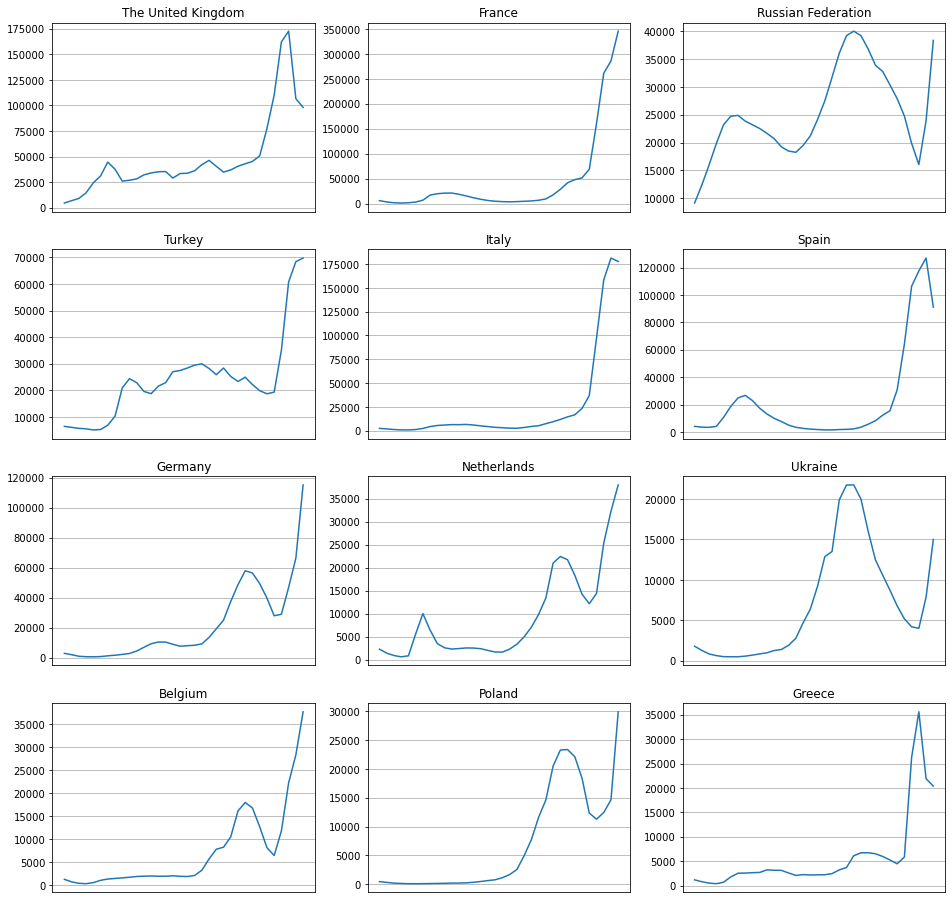

In [52]:
plt.subplots(4, 3, figsize=(16,16))
for index,c in enumerate(countries,1):
    df_tmp = df.query(f" Date_reported>='2021-06-01' and Country=='{c}' ").\
        set_index('Date_reported')["New_cases"].resample("7D").mean()
    plt.subplot(4, 3, index)
    plt.plot(df_tmp.index, df_tmp.values)
    plt.title(c)
    plt.xticks([])
    plt.grid()

### Wykresy słupkowe

In [53]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [54]:
df = sns.load_dataset("titanic")
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [57]:
df["class"].value_counts()

Third     491
First     216
Second    184
Name: class, dtype: int64

<AxesSubplot:xlabel='class', ylabel='count'>

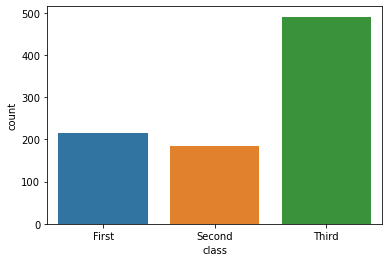

In [58]:
sns.countplot(data=df, x="class")

<AxesSubplot:xlabel='count', ylabel='class'>

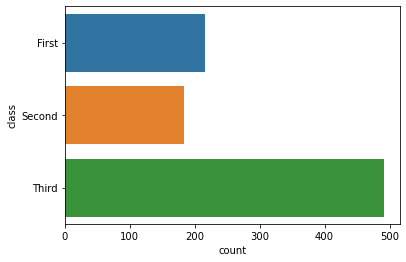

In [59]:
sns.countplot(data=df, y="class")

<AxesSubplot:xlabel='class', ylabel='count'>

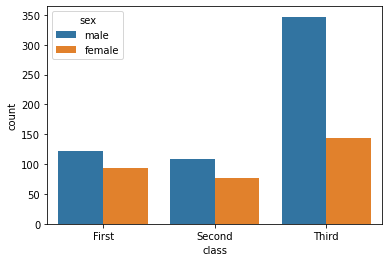

In [60]:
sns.countplot(data=df, x="class", hue="sex")

<AxesSubplot:xlabel='alive', ylabel='count'>

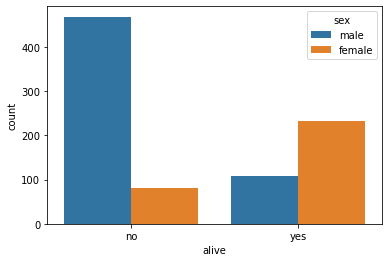

In [62]:
sns.countplot(data=df, x="alive", hue="sex")

In [65]:
df = sns.load_dataset("car_crashes").sort_values("total", ascending=False)
df

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
40,23.9,9.082,9.799,22.944,19.359,858.97,116.29,SC
34,23.9,5.497,10.038,23.661,20.554,688.75,109.72,ND
48,23.8,8.092,6.664,23.086,20.706,992.61,152.56,WV
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
17,21.4,4.066,4.922,16.692,16.264,872.51,137.13,KY
26,21.4,8.346,9.416,17.976,18.190,816.21,85.15,MT
18,20.5,7.175,6.765,14.965,20.090,1281.55,194.78,LA
36,19.9,6.368,5.771,18.308,18.706,881.51,178.86,OK
42,19.5,4.095,5.655,15.990,15.795,767.91,155.57,TN
43,19.4,7.760,7.372,17.654,16.878,1004.75,156.83,TX


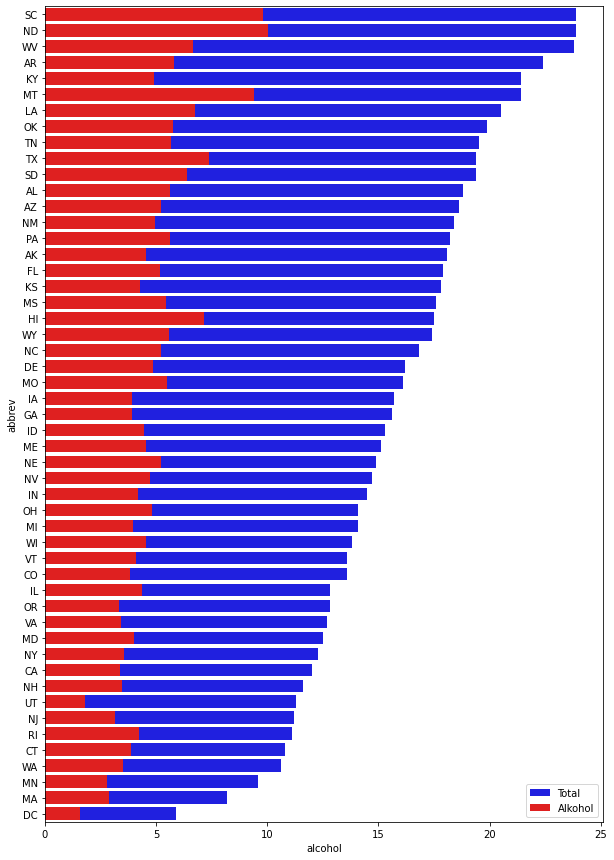

In [72]:
plt.figure(figsize=(10, 15))
sns.barplot(data=df, x="total", y="abbrev", color="b", label="Total")
sns.barplot(data=df, x="alcohol", y="abbrev", color="r", label="Alkohol")
plt.legend()

### Wykres pudełkowy

In [73]:
df = pd.read_csv("http://51.91.120.89/extras/pokemon.csv")
df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


<AxesSubplot:xlabel='Attack', ylabel='Type 1'>

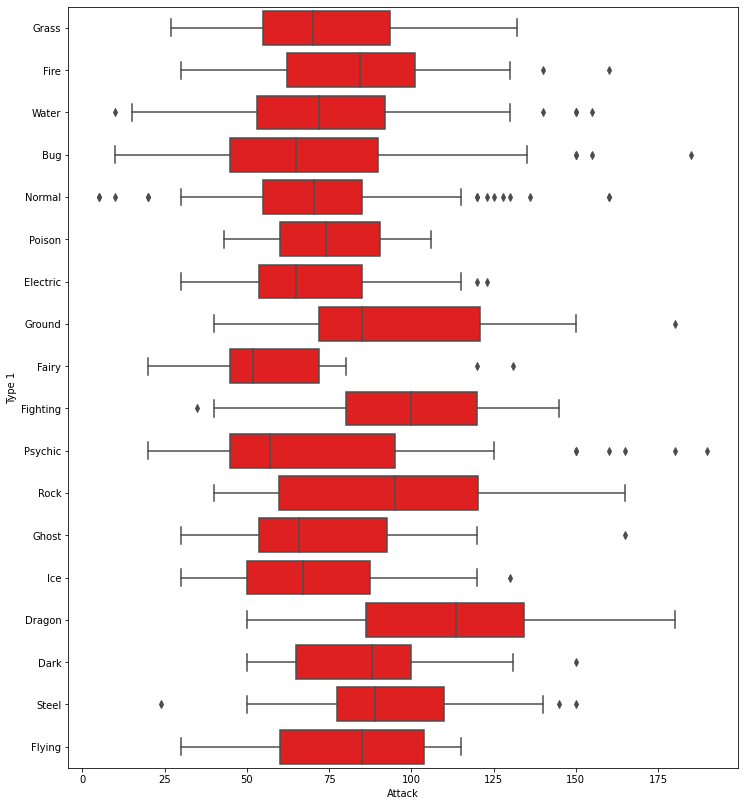

In [76]:
plt.figure(figsize=(12,14))
sns.boxplot(data=df, x="Attack", y="Type 1", color="r", whis=1)

<AxesSubplot:xlabel='Type 1', ylabel='Attack'>

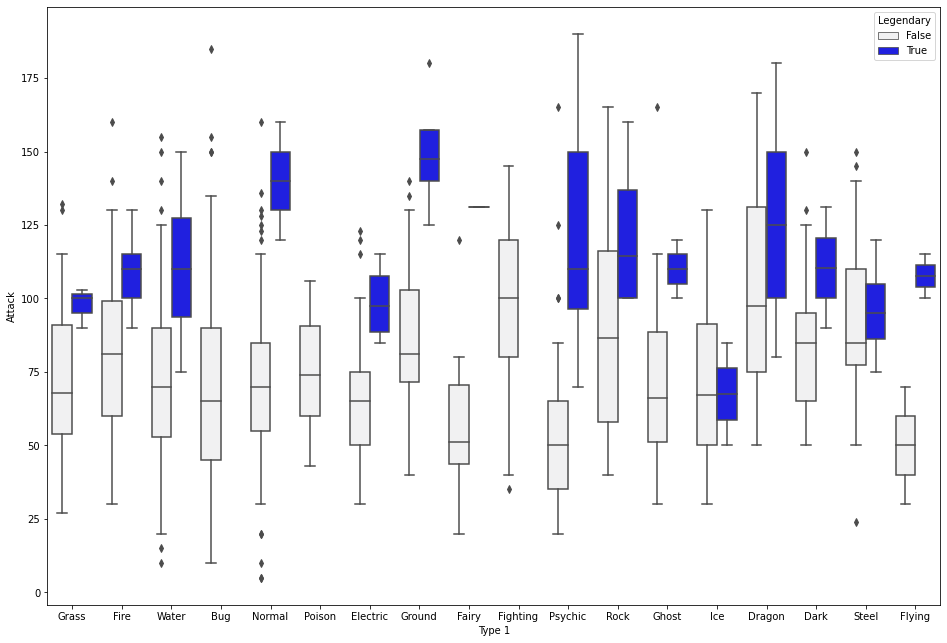

In [79]:
plt.figure(figsize=(16,11))
sns.boxplot(data=df, y="Attack", x="Type 1", color="b", whis=1, hue="Legendary")

### Mapa ciepła (heatmap)

In [80]:
df = sns.load_dataset("flights")
df

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [81]:
df1 = pd.pivot_table(df, index="month", columns="year", values="passengers")
df1

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


<AxesSubplot:xlabel='year', ylabel='month'>

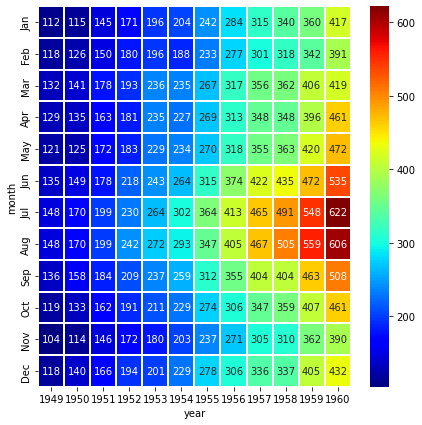

In [88]:
plt.figure(figsize=(7,7))
sns.heatmap(df1, annot=True, fmt="d", cmap="jet", linewidth=2)

### Wykres rozkładu wartości (distribution plot)

In [89]:
df = pd.read_csv("http://51.91.120.89/extras/gapminderDataFiveYear.csv")
df

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,1987,9216418.0,Africa,62.351,706.157306
1700,Zimbabwe,1992,10704340.0,Africa,60.377,693.420786
1701,Zimbabwe,1997,11404948.0,Africa,46.809,792.449960
1702,Zimbabwe,2002,11926563.0,Africa,39.989,672.038623


C:\Users\kurs\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='lifeExp', ylabel='Density'>

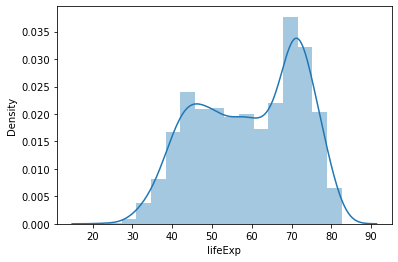

In [90]:
sns.distplot(df.lifeExp)

<AxesSubplot:xlabel='lifeExp'>

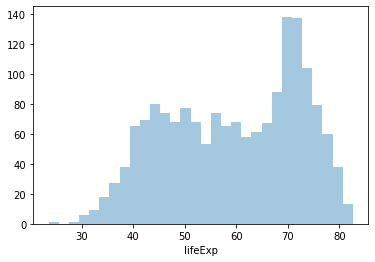

In [92]:
sns.distplot(df.lifeExp, kde=False, bins=30)

C:\Users\kurs\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\kurs\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='lifeExp', ylabel='Density'>

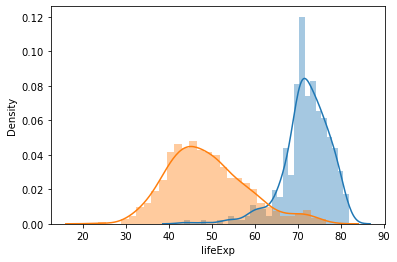

In [97]:
sns.distplot(df.query("continent=='Europe'").lifeExp , kde=True, bins=30, label="E")
sns.distplot(df.query("continent=='Africa'").lifeExp , kde=True, bins=30, label="A")

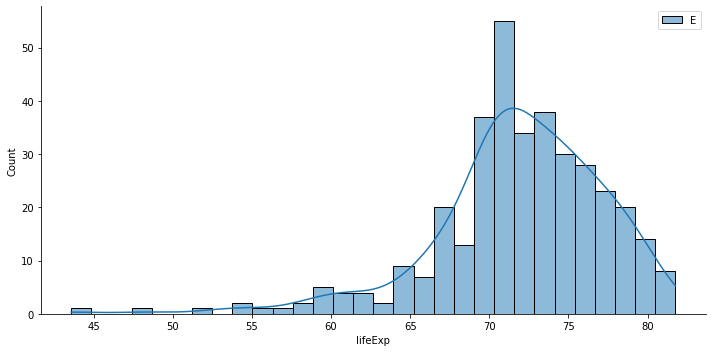

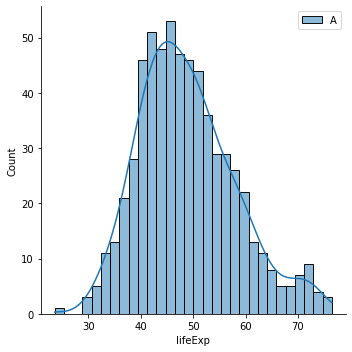

In [105]:
sns.displot(df.query("continent=='Europe'").lifeExp , kde=True, bins=30, label="E", aspect=2)
plt.legend()
sns.displot(df.query("continent=='Africa'").lifeExp , kde=True, bins=30, label="A")
plt.legend()

In [101]:
!pip install seaborn -U

In [102]:
sns.__version__

'0.11.2'

In [104]:
[item for item in dir(sns) if 'dis' in item ]

['displot', 'distplot', 'distributions']

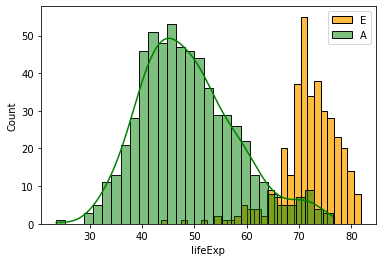

In [109]:
sns.histplot(df.query("continent=='Europe'").lifeExp , kde=False, bins=30, label="E", color="orange")
sns.histplot(df.query("continent=='Africa'").lifeExp , kde=True, bins=30, label="A", color="green")
plt.legend()